In [45]:
import sys
sys.path.append('../..')
from src.pomdp import *

import numpy as np
import matplotlib.pyplot as plt

In [14]:
tank_size = [30,40]
grid_size = [(s*2)+1 for s in tank_size]

In [15]:
grid = np.zeros(grid_size)

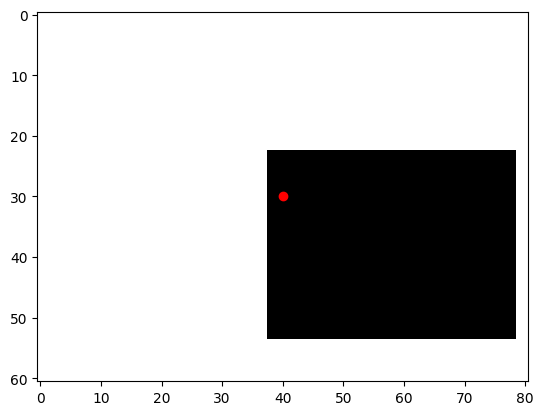

In [51]:
source_point = (np.random.random(2) * np.array(tank_size)).astype(int)

belief = np.zeros(grid_size)
belief[source_point[0]:source_point[0]+tank_size[0]+1, source_point[1]:source_point[1]+tank_size[1]+1] = 1
belief /= np.sum(belief)

plt.imshow(belief, cmap='Greys')
plt.scatter(tank_size[1], tank_size[0], c='red')

In [ ]:
model = None # Input this /!\
fsvi_solver = FSVI_Solver()

# Set the initial value function (empty)
vf = ValueFunction(model=model)


for i in range(100):
    # Generate a belief of the tank size
    belief_array = np.zeros(grid_size)
    belief_array[source_point[0]:source_point[0]+tank_size[0]+1, source_point[1]:source_point[1]+tank_size[1]+1] = 1
    belief_array /= np.sum(belief_array)

    belief_point = Belief(model=model, values=belief_array.ravel())

    vf, _ = fsvi_solver.solve(
                    model=model,
                    expansions=5, # Experiment with different values
                    max_belief_growth=100, # Should be around the optimal length to reach the source from any point (or a bit lower)
                    initial_belief=belief_point,
                    initial_value_function=vf
        )